## Mars Photogrammetry Preprocessing Pipeline

By Christian Tate, Cornell University; Ithaca, NY

https://github.com/cdt59/MPPP


In [1]:
# Import python modules

import numpy as np
import cv2, glob, time, os
import matplotlib.pyplot as plt

# from planetaryimage import PDS3Image
import colour_demosaicing
# from PIL import Image
# import matplotlib.cm as cm
# from scipy import interpolate
# from scipy.spatial.transform import Rotation as R
import colour_demosaicing
import pandas as pd

%run MPPP.py

%matplotlib inline

# df_cmods_v2 = pd.read_csv( "Tables - CAHV vs focus.csv" )


# time.sleep(60*60)

# df_cmods_v2

c:\Users\cdt59\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
# Set input path to IMG files and search criteria

pre = ''
suf = 'references'


# Set input and output directories
# directory_input  = 'Z:/Mastcam-Z/agisoft/data'
# directory_output = 'Z:/Mastcam-Z/agisoft/images'

directory_input  =  'C:/Users/cdt59/Documents\MPPP_workspace/MPPP/data/Sol_0709'
directory_output =  'C:/Users/cdt59/Documents\MPPP_workspace/MPPP/data/Sol_0709'


sol = '07'

# pre = 'Z*0_'+str(sol)+'*_0'
# suf = 'refs_'+str(sol).zfill(2)+'_zcam'

# pre = '*F_'+str(sol)+'*_0'
# suf = 'refs_'+str(sol).zfill(3)+'_ecam'

# pre = '*M_'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_vce_ecam'

# pre = '*V0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_vec'

# pre = 'HN*_0'+str(sol)+'*_06'
# suf = 'refs_'+str(sol).zfill(3)+'_heli'

# pre = 'FLF_'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_ecam_way'

# pre = '*F_'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_ecam_rnav'


pre = '*_'+str(sol)+'*_0'
suf = 'refs_'+str(sol)


sequ_id = ''
index   = ''

path_input     = directory_input
IMG_paths      = [] 
IMG_paths     += sorted( glob.glob(  directory_input + '/' +pre+'*_N*'+sequ_id+'*'+index+'.IMG' ) ) 
IMG_paths     += sorted( glob.glob(  directory_input + '/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*'+index+'.IMG' ) ) 

if 'F_' in pre or 'V' in pre or 'M' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
if 'Z' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/zcam/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
    IMG_paths += sorted( glob.glob(  directory_input + '/zcam/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 

IMG_paths = IMG_paths[:]

print( len(IMG_paths), 'images\n')

# # remove duplicates in image set

# %run MPPP.py
remove_duplicate_IMGs( IMG_paths )

IMG_paths[:]

26 images

0


['C:/Users/cdt59/Documents\\MPPP_workspace/MPPP/data/Sol_0709\\FLF_0711_0730074611_304RAD_N0332864FHAZ00206_0A0295J01.IMG',
 'C:/Users/cdt59/Documents\\MPPP_workspace/MPPP/data/Sol_0709\\FRF_0711_0730074611_304RAD_N0332864FHAZ00206_0A0295J01.IMG',
 'C:/Users/cdt59/Documents\\MPPP_workspace/MPPP/data/Sol_0709\\NLF_0709_0729883381_848RAD_N0332864SAPP00601_0A00LLJ01.IMG',
 'C:/Users/cdt59/Documents\\MPPP_workspace/MPPP/data/Sol_0709\\NLF_0709_0729889968_787RAD_N0332864NCAM03709_0A0195J01.IMG',
 'C:/Users/cdt59/Documents\\MPPP_workspace/MPPP/data/Sol_0709\\NLF_0709_0729890432_073RAD_N0332864NCAM00709_0A0095J02.IMG',
 'C:/Users/cdt59/Documents\\MPPP_workspace/MPPP/data/Sol_0709\\NLF_0709_0729893052_304RAD_N0332864NCAM12709_0A0195J01.IMG',
 'C:/Users/cdt59/Documents\\MPPP_workspace/MPPP/data/Sol_0709\\NLF_0709_0729895644_487RAD_N0332864SCAM02709_0A00LLJ01.IMG',
 'C:/Users/cdt59/Documents\\MPPP_workspace/MPPP/data/Sol_0709\\NRF_0709_0729889968_787RAD_N0332864NCAM03709_0A0195J01.IMG',
 'C:/Use

26 images

0 FLF_0711_0730074611_304RAD_N0332864FHAZ00206_0A0295J01.IMG
The new directory is created:  C:/Users/cdt59/Documents\MPPP_workspace/MPPP/data/Sol_0709/sols_0700-0799_eng
sol 711 site 33 drive 2864
XYZ_ENU = [1.104, 0.009, 0.729] YPR = [-0.10, 63.93, 9.81]  OPK = [63.92, 9.89, 0.04]

1 FRF_0711_0730074611_304RAD_N0332864FHAZ00206_0A0295J01.IMG
sol 711 site 33 drive 2864
XYZ_ENU = [1.091, -0.239, 0.735] YPR = [-0.19, 64.01, -10.14]  OPK = [64.02, -9.97, 0.08]

2 NLF_0709_0729883381_848RAD_N0332864SAPP00601_0A00LLJ01.IMG
sol 709 site 33 drive 2864
XYZ_ENU = [0.728, -0.357, 2.057] YPR = [347.62, 11.64, 359.73]  OPK = [168.56, 2.21, -12.13]

3 NLF_0709_0729889968_787RAD_N0332864NCAM03709_0A0195J01.IMG
sol 709 site 33 drive 2864
XYZ_ENU = [0.797, -0.303, 1.906] YPR = [-35.13, 60.12, -0.29]  OPK = [55.02, 29.65, 19.26]

4 NLF_0709_0729890432_073RAD_N0332864NCAM00709_0A0095J02.IMG
sol 709 site 33 drive 2864
XYZ_ENU = [0.846, -0.311, 1.868] YPR = [-22.44, 44.66, -0.27]  OPK = [42.48,

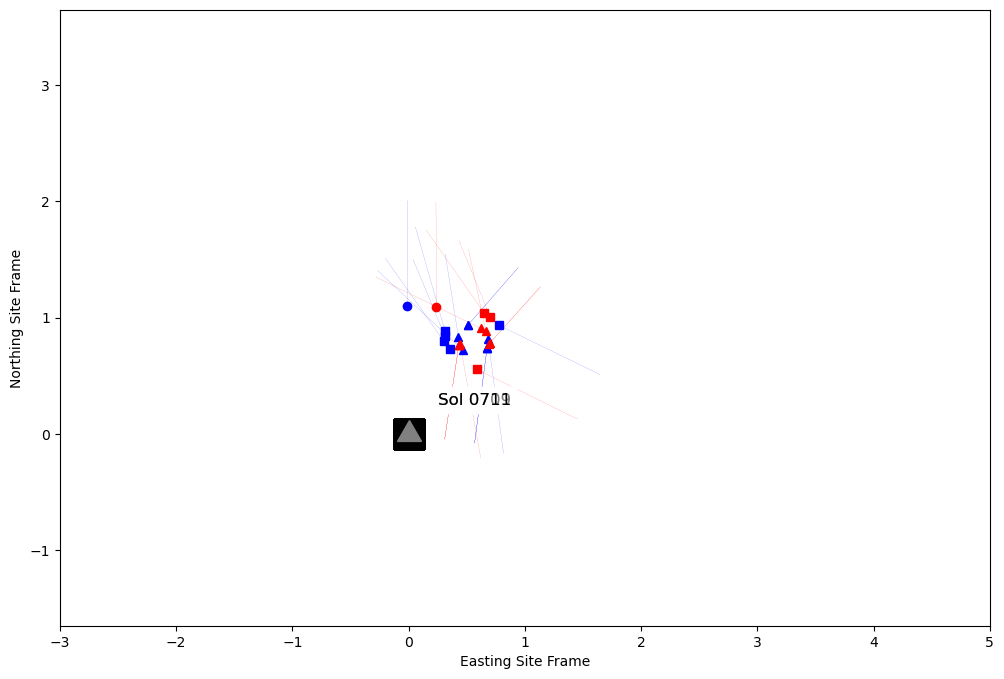

In [13]:
%%time

%run MPPP.py


# image_list_process( IMG_paths[::-1], directory_output, suf, find_offsets_mode = 1 )
image_list_process( IMG_paths[:], directory_output, suf, find_offsets_mode = 0, frame='rnav', angles='opk', save_im=0 )
# image_list_process( IMG_paths[::1], directory_output, suf, find_offsets_mode = 0, frame='site3', save_im=1  )
# image_list_process( IMG_paths[:], directory_output, suf, angles='opk' )

In [ ]:
# Find rover localizations

import urllib.request, json 

'''

https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json

https://docs.google.com/spreadsheets/d/1GSNJL-e5iROCaKUC4BXL_OA8hWy8vUdfCN7levRNkZA/edit#gid=1232397498

''' 
# path =  'C:/Users/cornell/Downloads/M20_waypoints.json'
# with open( path ) as f:
#     data = json.load(f)

with urllib.request.urlopen("https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json") as url:
    data = json.loads(url.read().decode())

    
site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


for i in range(len(data['features']))[::-1]:
    
    print( data['features'][i]['properties']['sol'],'\t',
           data['features'][i]['properties']['site'], '\t',
           data['features'][i]['properties']['drive'],'\t',
           '0.0'+'\t','0.0'+'\t','0.0'+'\t',
           np.round( np.float64(data['features'][i]['properties']['easting'])- np.float64(site3_E), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['northing'])- np.float64(site3_N), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A), 3),'\t',
         )

1052 	 50 	 1250 	 0.0	 0.0	 0.0	 -6963.265 	 2779.739 	 189.143 	
1052 	 50 	 820 	 0.0	 0.0	 0.0	 -6917.614 	 2777.855 	 189.059 	
1049 	 50 	 524 	 0.0	 0.0	 0.0	 -6863.303 	 2767.243 	 187.631 	
1047 	 50 	 0 	 0.0	 0.0	 0.0	 -6823.604 	 2743.703 	 185.082 	
1046 	 49 	 5338 	 0.0	 0.0	 0.0	 -6739.608 	 2755.727 	 178.884 	
1045 	 49 	 4054 	 0.0	 0.0	 0.0	 -6618.949 	 2873.183 	 170.788 	
1045 	 49 	 3114 	 0.0	 0.0	 0.0	 -6509.005 	 2851.897 	 168.997 	
1043 	 49 	 2918 	 0.0	 0.0	 0.0	 -6466.093 	 2867.595 	 168.719 	
1043 	 49 	 2888 	 0.0	 0.0	 0.0	 -6463.19 	 2867.567 	 168.205 	
1042 	 49 	 2818 	 0.0	 0.0	 0.0	 -6452.031 	 2862.629 	 167.596 	
1041 	 49 	 1444 	 0.0	 0.0	 0.0	 -6386.998 	 2842.613 	 162.212 	
1021 	 49 	 370 	 0.0	 0.0	 0.0	 -6260.156 	 2834.556 	 163.943 	
1019 	 49 	 0 	 0.0	 0.0	 0.0	 -6231.73 	 2847.231 	 161.987 	
1018 	 48 	 3714 	 0.0	 0.0	 0.0	 -6259.232 	 2850.077 	 159.722 	
1007 	 48 	 2404 	 0.0	 0.0	 0.0	 -6111.767 	 2849.021 	 160.334 	
1006 	

'ZL0_0009_0667740955_076RAD_N0020000ZCAM03000_0260LMA01'